In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read excel file '~/Downloads/mkt_data.xlsx' into a pandas dataframe, using the date column as the index of dates, sort the dates in ascending order
df = pd.read_excel('~/Downloads/mkt_data.xlsx', index_col='Date', parse_dates=['Date']).sort_index()
df.index = pd.DatetimeIndex(df.index).to_period('D')

# add additional columns
df['d_US10Y'] = df['US10Y'].diff() * 100
df['d_SPX'] = df['SPX'].pct_change() * 100
df['d_CDXIG5Y'] = df['CDXIG5Y'].diff()
df['d_WTI'] = df['WTI'].pct_change() * 100
df['d_UMBS30OAS'] = df['UMBS30OAS'].diff()

# fill missing values using interpolation
df = df.interpolate()
df.head()

# copy df to dff, which is df with the index dates limited to start from 2010-01-01 to end date 2020-12-31
dff = df.loc['2022-01-01':].copy()

# create idx which is the index after sorting on the absolute value of the column zcol in descending order

zcol = 'd_US10Y'
idx = dff[zcol].abs().sort_values(ascending=False).index

print(idx[0:10])






PeriodIndex(['2022-11-10', '2022-09-28', '2022-11-11', '2023-03-10',
             '2022-06-13', '2024-04-10', '2022-09-22', '2023-11-14',
             '2023-03-17', '2024-08-02'],
            dtype='period[D]', name='Date')


/tmp/ipykernel_3983/154233545.py:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['d_SPX'] = df['SPX'].pct_change() * 100
/tmp/ipykernel_3983/154233545.py:14: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['d_WTI'] = df['WTI'].pct_change() * 100


              d_US10Y     d_SPX  d_CDXIG5Y     d_WTI  d_UMBS30OAS
d_US10Y      1.000000 -0.109387   0.084637  0.099469     0.530862
d_SPX       -0.109387  1.000000  -0.678416  0.073702    -0.266773
d_CDXIG5Y    0.084637 -0.678416   1.000000 -0.156750     0.189065
d_WTI        0.099469  0.073702  -0.156750  1.000000     0.002007
d_UMBS30OAS  0.530862 -0.266773   0.189065  0.002007     1.000000


,d_US10Y_vol,d_SPX_vol,d_CDXIG5Y_vol,d_WTI_vol,d_UMBS30OAS_vol
Date,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN
2022-01-04,NaN,NaN,NaN,NaN,NaN
2022-01-05,NaN,NaN,NaN,NaN,NaN
2022-01-06,NaN,NaN,NaN,NaN,NaN
2022-01-07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-05-16,123.460362,30.586929,1.714976,3.267614,2.179282
2022-05-17,122.733833,31.645127,1.752254,3.284534,2.239848
2022-05-18,124.046510,34.042418,2.076554,3.365940,2.374617


<Figure size 1000x500 with 0 Axes>

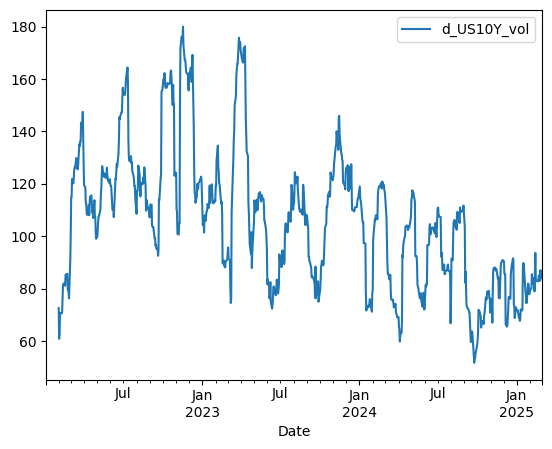

In [ ]:
print(dff.iloc[:, 5:].corr())

# calculate the rolling 22-day volatility of the columns in dff
dff['d_US10Y_vol'] = dff['d_US10Y'].rolling(22).std()*np.sqrt(252)
dff['d_SPX_vol'] = dff['d_SPX'].rolling(22).std()*np.sqrt(252)
dff['d_CDXIG5Y_vol'] = dff['d_CDXIG5Y'].rolling(22).std()
dff['d_WTI_vol'] = dff['d_WTI'].rolling(22).std()
dff['d_UMBS30OAS_vol'] = dff['d_UMBS30OAS'].rolling(22).std()

display(dff.iloc[:, 10:].head(100))

plt.figure(figsize=(10, 5))
dff[['d_US10Y_vol']].plot()
plt.show()

In [1]:
12*0.37/203.7


0.021796759941089837

              d_US10Y     d_SPX  d_CDXIG5Y     d_WTI  d_UMBS30OAS
d_US10Y      1.000000 -0.108861   0.079342  0.098639     0.528721
d_SPX       -0.108861  1.000000  -0.680796  0.073702    -0.279904
d_CDXIG5Y    0.079342 -0.680796   1.000000 -0.159054     0.195670
d_WTI        0.098639  0.073702  -0.159054  1.000000     0.009578
d_UMBS30OAS  0.528721 -0.279904   0.195670  0.009578     1.000000


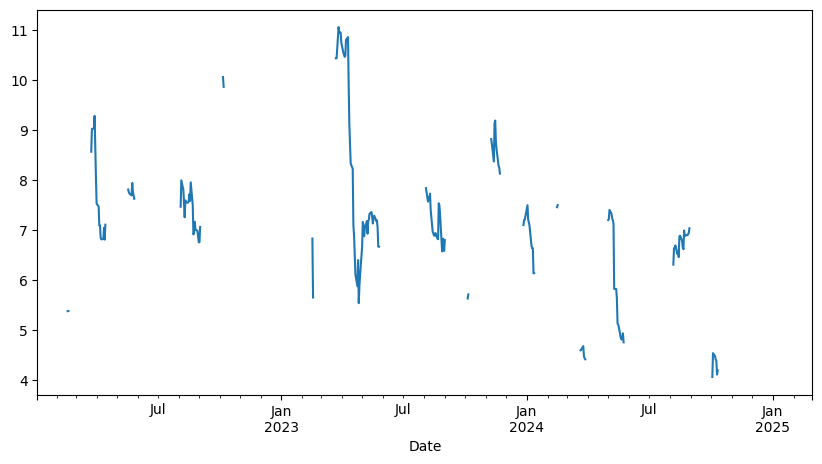

,US10Y,SPX,CDXIG5Y,WTI,UMBS30OAS,d_US10Y,d_SPX,d_CDXIG5Y,d_WTI,d_UMBS30OAS,d_US10Y_vol,d_SPX_vol,d_CDXIG5Y_vol,d_WTI_vol,d_UMBS30OAS_vol
Date,,,,,,,,,,,,,,,
2022-11-10,3.82931,3956.37,89.9794,86.96,31.19220,-32.011,5.543447,-7.1469,0.998839,-23.93710,9.648684,1.952386,2.210884,2.429784,6.373234
2022-09-28,3.70521,3719.04,112.7200,82.43,42.60780,-25.520,1.967214,-2.5550,4.157190,-3.93750,NaN,1.408325,3.143189,2.832183,NaN
2023-03-10,3.69496,3861.59,85.5009,76.39,20.36780,-22.825,-1.447814,4.7791,1.125232,-1.51780,NaN,0.958284,1.633555,1.579024,NaN
2022-06-13,3.36758,3749.63,102.3480,120.85,38.54170,21.008,-3.876837,6.8402,0.415455,-3.36620,NaN,1.941682,2.874263,2.099226,NaN
2024-04-10,4.55932,5160.64,55.1534,86.98,40.37350,19.668,-0.945698,1.1013,1.033802,3.88680,NaN,0.638855,1.167949,1.274978,NaN
2022-09-22,3.70586,3757.99,107.8990,83.88,49.61750,19.554,-0.842760,3.0400,0.239006,13.39450,NaN,1.488578,3.028061,2.578860,NaN
2023-11-14,4.43949,4495.70,69.8629,78.82,43.24030,-18.952,1.907493,-3.8708,0.063476,-9.96490,9.137959,1.047171,1.653765,2.118252,3.740947
2023-03-17,3.39268,3916.64,91.9205,66.61,30.47010,-18.815,-1.101942,2.2588,-2.259721,-5.86510,NaN,1.090715,2.963320,2.130228,NaN
2024-08-02,3.79178,5346.56,60.9634,74.78,24.53640,-18.375,-1.838184,4.7016,-4.226434,-6.23880,NaN,1.009861,1.218198,1.840044,NaN


In [ ]:


#plt.figure(figsize=(10, 10))
# add a regression line to each scatterplot
#sns.pairplot(dff.iloc[:, 5:], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})

#plt.show()

# reindex the dataframe using idx
dff = dff.reindex(idx)

dff.head(20)

Use the following AI prompt:

For the following dates: '2022-11-10', '2022-09-28', '2023-03-10', '2022-06-13',
               '2024-04-10', '2022-09-22', '2023-11-14', '2023-03-17',
               '2024-08-02', '2023-03-13', find what significant market moving events took place that could cause large movements in US interest rates. Market moving events including release of major economic numbers such as CPI, PMI, Fed FOMC rate actions, earning surprises of major companies, geopolitical news events, etc.

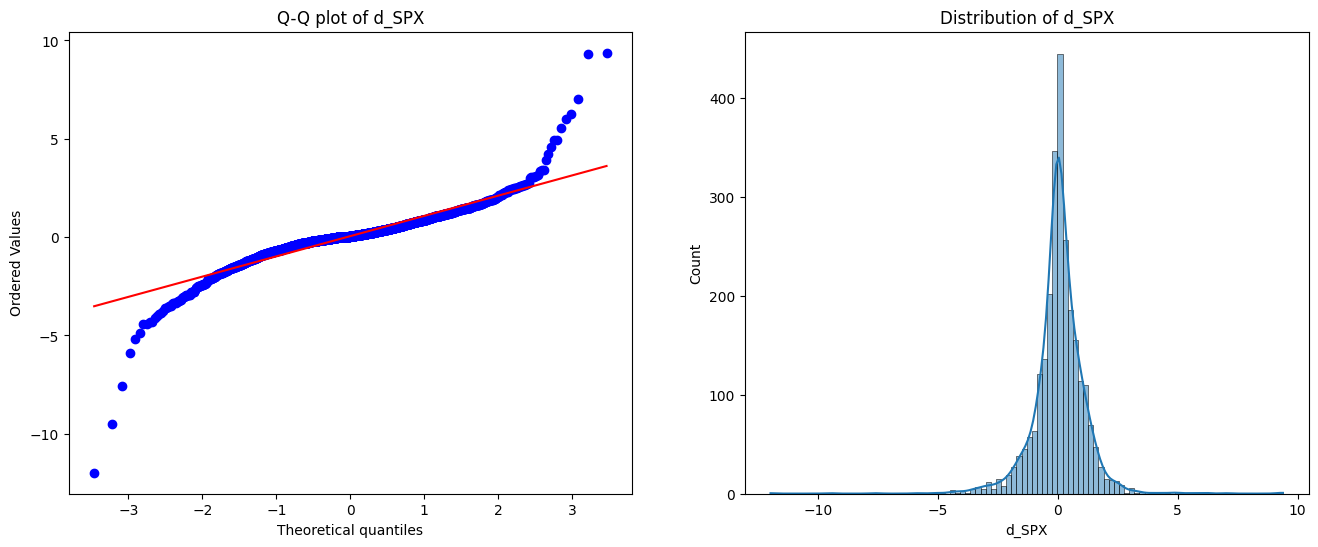

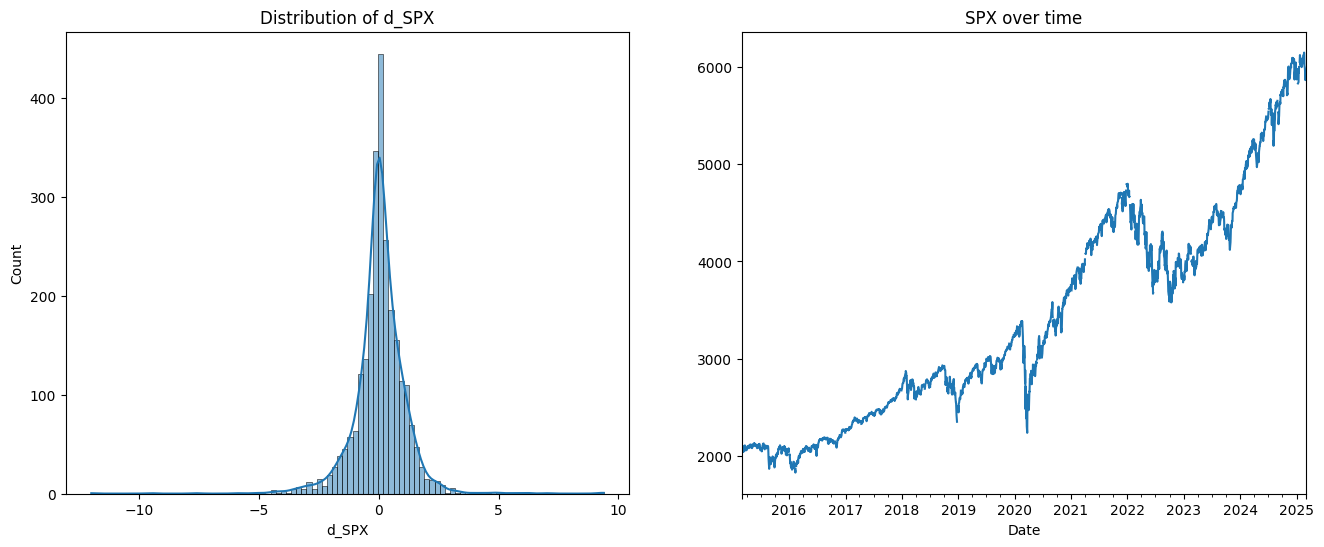

In [56]:
# generate a q-q plot of d_SPX, comparing it to a normal distribution
from scipy.stats import probplot
fig, ax = plt.subplots(1, 2, figsize=(16,6))
probplot(df['d_SPX'].dropna(), plot=ax[0])
ax[0].set_title('Q-Q plot of d_SPX')
sns.histplot(df['d_SPX'], bins=100, kde=True, ax=ax[1])
ax[1].set_title('Distribution of d_SPX')
plt.show()

# generate a plot with the two subplots. Left: the distribution of d_SPX, size 6x6.  Right: SPX over time,  size 10x6
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.histplot(df['d_SPX'], bins=100, kde=True, ax=ax[0])
ax[0].set_title('Distribution of d_SPX')
df['SPX'].plot(ax=ax[1])
ax[1].set_title('SPX over time')
plt.show()




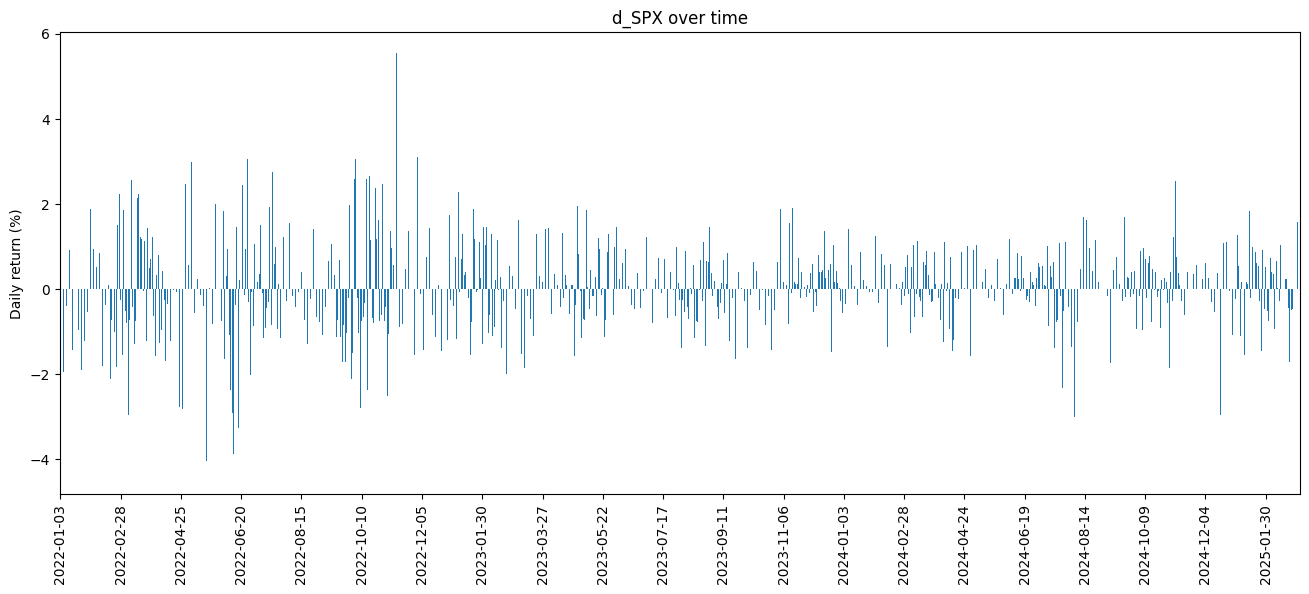

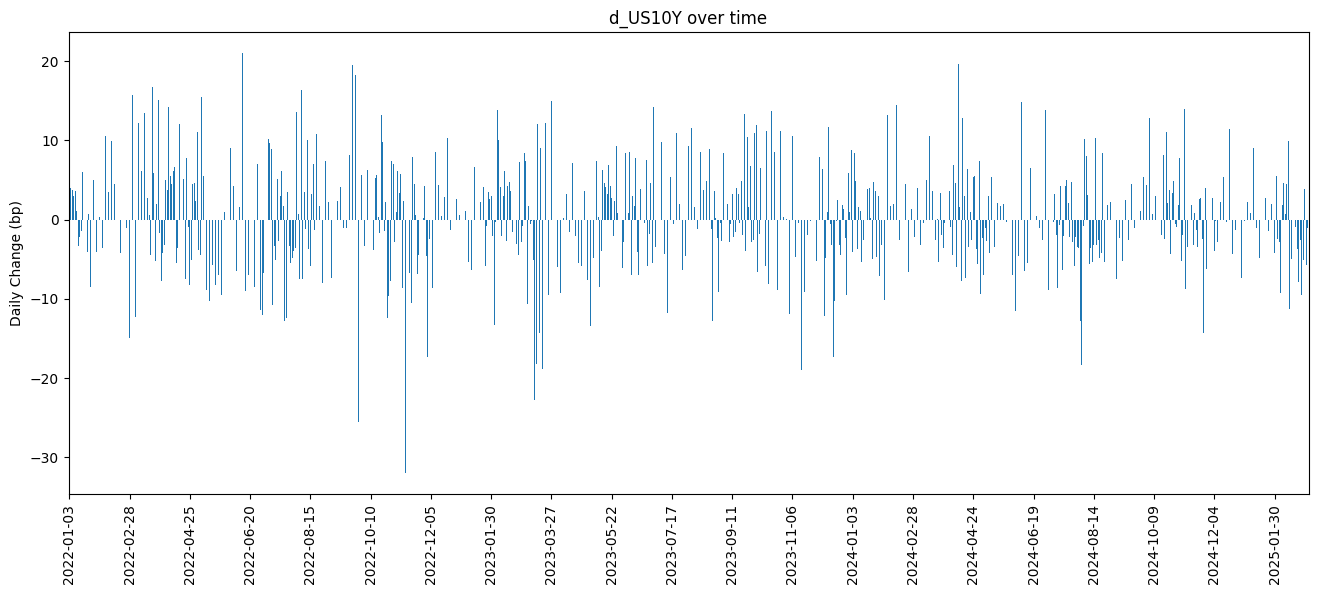

In [59]:
# reindex dff by sorting the index in ascending order
dff = dff.sort_index()

# plot dff['d_SPX'] as bars over time, size 10x6, show only the major ticks on the x-axis
fig, ax = plt.subplots(figsize=(16,6))
dff['d_SPX'].plot(kind='bar', ax=ax)
ax.set_title('d_SPX over time')
ax.set_ylabel('Daily return (%)')
ax.xaxis.set_major_locator(plt.MaxNLocator(24))
ax.set_xlabel('')
plt.show()

# save the plot to a file 'd_SPX.png'
fig.savefig('d_SPX.png')

# plot dff['d_US10Y'] as bars over time, size 10x6, show only the major ticks on the x-axis
fig, ax = plt.subplots(figsize=(16,6))
dff['d_US10Y'].plot(kind='bar', ax=ax)
ax.set_title('d_US10Y over time')
ax.set_ylabel('Daily Change (bp)')
ax.xaxis.set_major_locator(plt.MaxNLocator(24))
ax.set_xlabel('')
plt.show()

# save the plot to a file 'd_US10Y.png'
fig.savefig('d_US10Y.png')